# 05 de septiembre de 2023

In [1]:
import functions as fx 
import pandas as pd
from Bio import Entrez
Entrez.email = "diegocar@lcg.unam.mx"
Entrez.apikey = "34677fdcfd2f0659a7f9ee05ab6e44704f09"

In [2]:
def plot_species_dist(data, rel):
    ext = pd.merge(data,rel)
    print(f"n = {ext.shape[0]}")
    ext["Specie"].value_counts().plot(kind="barh")

def comp_filt(f1, label1, f2, label2, rel):
    x_raw = pd.DataFrame(pd.merge(f1, rel)["Specie"].value_counts()).reset_index().rename(columns={"Specie":f"{label1}", "index":"Specie"})
    x_data = pd.DataFrame(pd.merge(f2,rel))["Specie"].value_counts().reset_index().rename(columns={"Specie":f"{label2}", "index":"Specie"})
    pd.merge(x_raw, x_data).set_index("Specie").plot(kind="barh")

def comp_filt2(f1, label1, f2, label2, f3, label3, f4, label4, rel):
    x = pd.DataFrame(pd.merge(f1, rel)["Specie"].value_counts()).reset_index().rename(columns={"Specie":f"{label1}", "index":"Specie"})
    y = pd.DataFrame(pd.merge(f2,rel))["Specie"].value_counts().reset_index().rename(columns={"Specie":f"{label2}", "index":"Specie"})
    z = pd.DataFrame(pd.merge(f3, rel)["Specie"].value_counts()).reset_index().rename(columns={"Specie":f"{label3}", "index":"Specie"})
    w = pd.DataFrame(pd.merge(f4,rel))["Specie"].value_counts().reset_index().rename(columns={"Specie":f"{label4}", "index":"Specie"})
    a = pd.merge(x, y)
    b = pd.merge(z, w)
    pd.merge(a, b).set_index("Specie").plot(kind="bar")


In [13]:
raw = pd.read_csv("../results/231004BigTest/run10Locote/raw_231004Locote.tsv", sep="\t")
data = pd.read_csv("../results/231004BigTest/run10Locote/231004Locote.tsv", sep="\t")
rel = pd.read_csv("../results/231004BigTest/run10Locote/taxonomyRelation_231004Locote.tsv", sep="\t")
raw_v0 = pd.read_csv("../results/230928FilterComp/filt_V1/raw_230928filtv1.tsv", sep= "\t")
raw_v0.TaxId = raw_v0.TaxId.astype("str")
data_v0 = fx.apply_GEO_filters(raw_v0, "sameTaxId", "./", "0510taxonomy_relations.tsv")

n = 7128


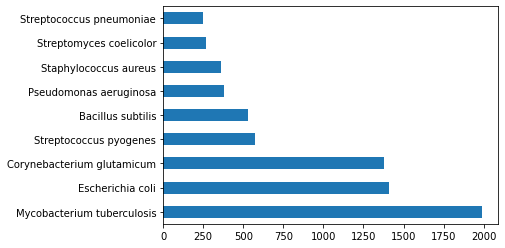

In [7]:
plot_species_dist(data, rel)

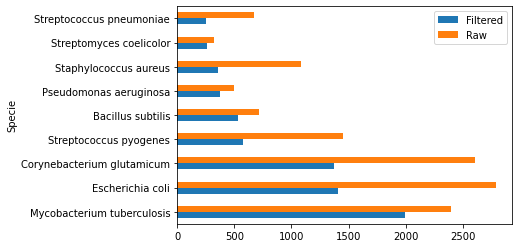

In [8]:
comp_filt(data, "Filtered", raw, "Raw", rel)

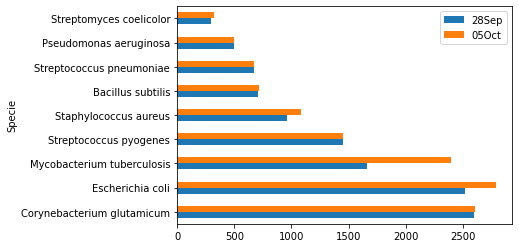

In [5]:
comp_filt(raw_v0, "28Sep", raw, "05Oct", rel)

In [15]:
comp_filt(data_v0, "28Sep", data, "05Oct", rel)

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [14]:
print(f"28 de septiembre: {data_v0.shape[0]}")

28 de septiembre: 6223
